In [1]:
pip install pandas numpy matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


           State/UT     2014     2015     2016     2017     2018     2019   
0   Jammu & Kashmir   6130.0   6306.0   6464.0   6645.0   6824.0   6844.0  \
1            Ladakh      NaN      NaN      NaN      NaN      NaN    159.0   
2  Himachal Pradesh   4239.0   4347.0   4434.0   4534.0   4642.0   4744.0   
3            Punjab  19393.0  19858.0  20332.0  20784.0  21278.0  21763.0   
4        Chandigarh    470.0    487.0    501.0    517.0    532.0    548.0   

      2020     2021     2022     2023  Unnamed: 11  Unnamed: 12  
0   7027.0   7211.0   7396.0   7575.0          NaN          NaN  
1    162.0    166.0    171.0    175.0          NaN          NaN  
2   4856.0   4953.0   5058.0   5180.0          NaN          NaN  
3  22276.0  22786.0  23301.0  23865.0          NaN          NaN  
4    564.0    582.0    598.0    612.0          NaN          NaN  
Index(['State/UT', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022', '2023', 'Unnamed: 11', 'Unnamed: 12'],
    

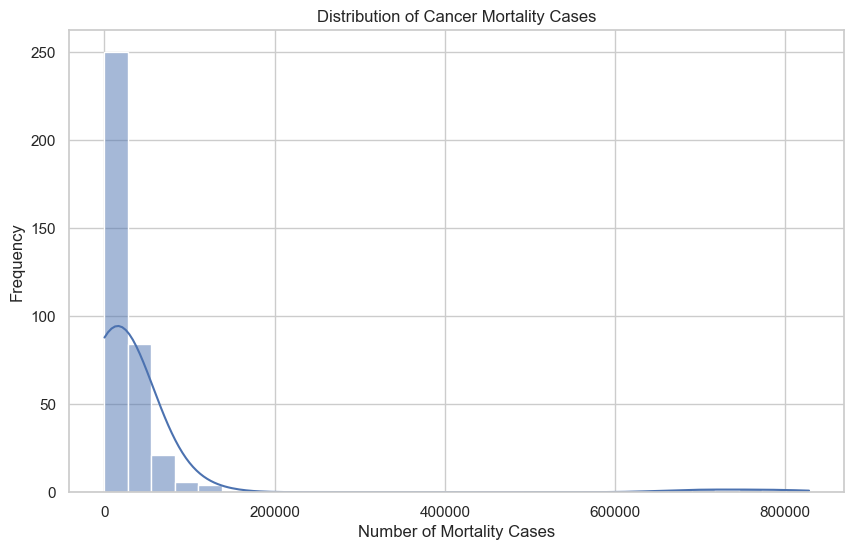

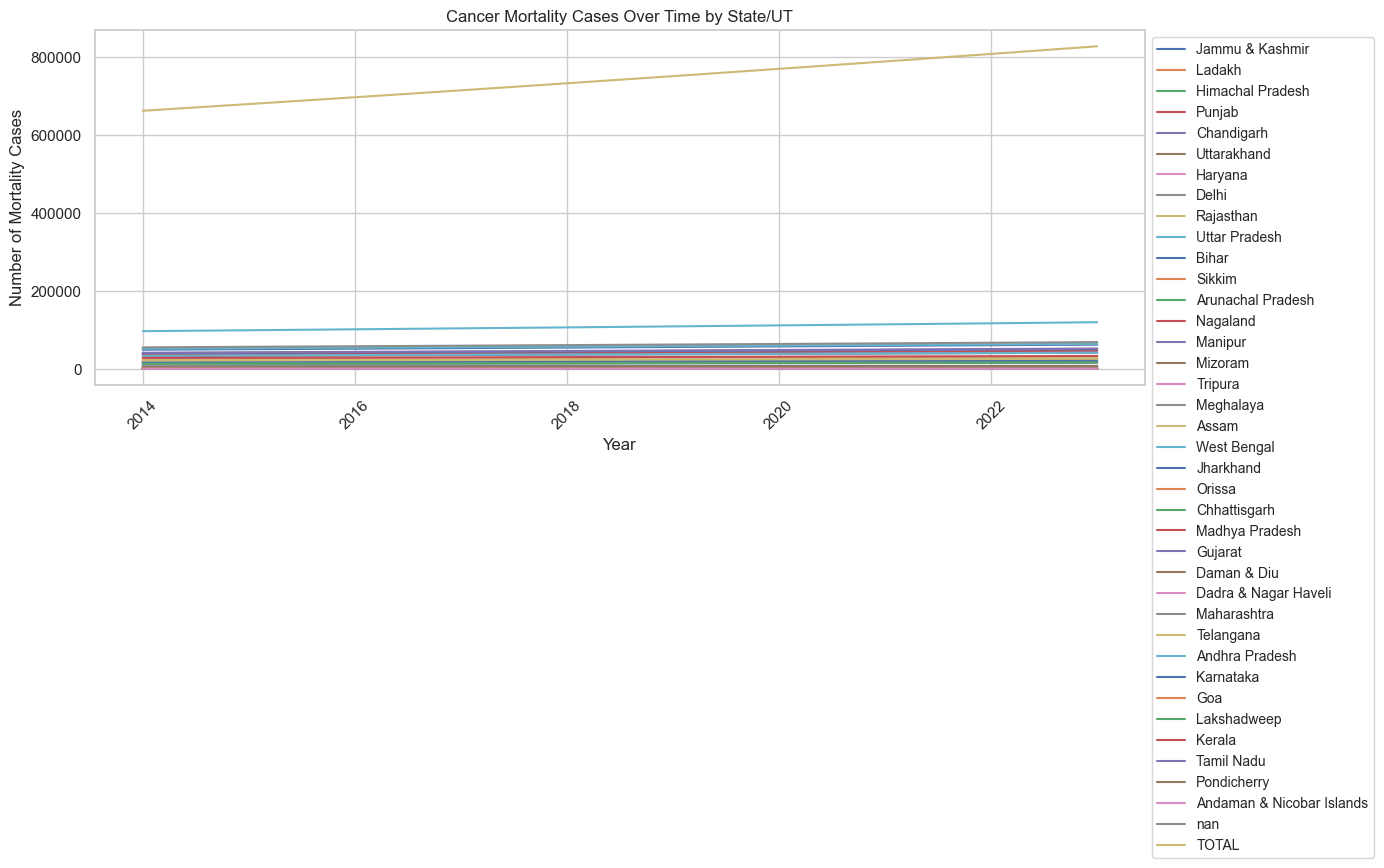

state/ut    1
2014        2
2015        2
2016        2
2017        2
2018        2
2019        1
2020        1
2021        1
2022        1
2023        1
dtype: int64


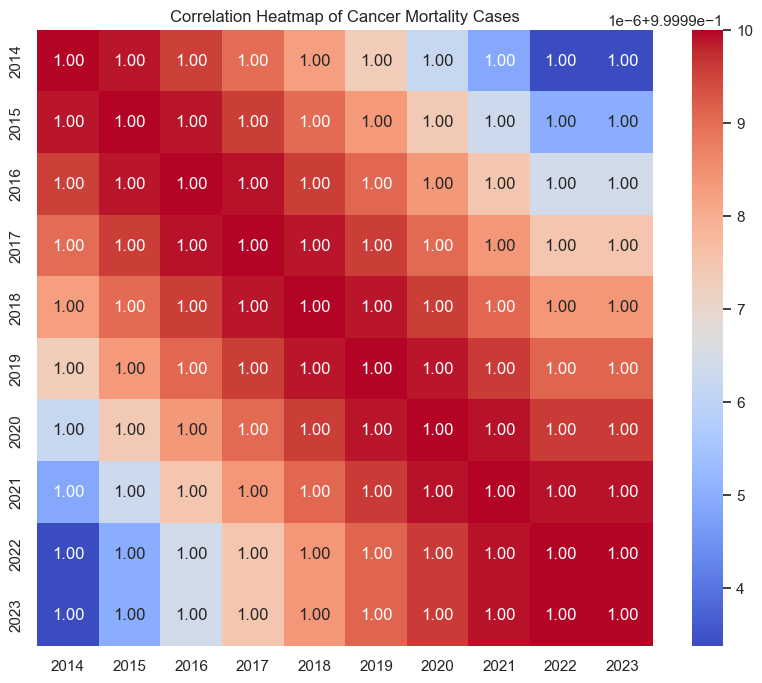

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Load the dataset
data = pd.read_csv('Estimated Mortality of Cancer Cases in India.csv')

# Display the first few rows of the dataset
print(data.head())

# Print the column names to understand the structure
print(data.columns)

# Drop any unnamed columns (usually extra columns)
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

# Strip whitespace from column names and convert to lowercase
data.columns = data.columns.str.strip().str.lower()

# Display basic information about the dataset
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Descriptive statistics
print(data.describe())

# Melt the DataFrame to have a long format for easier plotting
data_melted = data.melt(id_vars=['state/ut'], var_name='year', value_name='mortality_cases')

# Convert 'year' to numeric
data_melted['year'] = pd.to_numeric(data_melted['year'], errors='coerce')

# Convert 'mortality_cases' to numeric, handling any errors
data_melted['mortality_cases'] = pd.to_numeric(data_melted['mortality_cases'], errors='coerce')

# Check for any NaN values after conversion
print(data_melted.isnull().sum())

# Visualize the distribution of cancer mortality cases
plt.figure(figsize=(10, 6))
sns.histplot(data_melted['mortality_cases'], bins=30, kde=True)
plt.title('Distribution of Cancer Mortality Cases')
plt.xlabel('Number of Mortality Cases')
plt.ylabel('Frequency')
plt.show()

# Time series analysis: Plot total mortality cases over years for each state
plt.figure(figsize=(14, 7))
for state in data['state/ut'].unique():
    state_data = data_melted[data_melted['state/ut'] == state]
    plt.plot(state_data['year'], state_data['mortality_cases'], label=state)

plt.title('Cancer Mortality Cases Over Time by State/UT')
plt.xlabel('Year')
plt.ylabel('Number of Mortality Cases')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
plt.tight_layout()
plt.show()

# Correlation heatmap (if applicable)
# First, ensure we have a DataFrame with numerical values
# We will use the original data for correlation analysis
# Convert relevant columns to numeric
data_numeric = data.copy()
for col in data.columns[1:]:  # Skip the first column which is 'state/ut'
    data_numeric[col] = pd.to_numeric(data_numeric[col], errors='coerce')

# Check for any NaN values after conversion
print(data_numeric.isnull().sum())

# Calculate the correlation matrix using only numeric columns
correlation_matrix = data_numeric.select_dtypes(include=[np.number]).corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Cancer Mortality Cases')
plt.show()

# Grouping data by state and plotting the total mortality cases for the latest year
latest_year = data.columns[-1]